In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from jupyterthemes import jtplot

In [4]:
jtplot.style('default', grid = False)

In [6]:
def load_data(filename : str) -> pd.DataFrame:
    voltage, a, q, trans, ke, uke = [], [], [], [], [], []
    with open(filename) as fin:
        lines = fin.readlines()
        for line, line2 in zip(lines[1:-1:7], lines[4:-1:7]):
            q.append(float(line.split(',')[2]))
            a.append(float(line.split(',')[1]))
            if '-1.#IND' in line2:
                line2 = line2.replace('-1.#IND', 'NaN')
            voltage.append(float(line2.split(',')[0]))
            trans.append(float(line2.split(',')[3]))
            ke.append(float(line2.split(',')[4]))
            uke.append(float(line2.split(',')[5]))


    df = pd.DataFrame({'voltage' : voltage, 'q' : q, 'a' : a, 'transmission' : trans, 'ke' : ke, 'uke' : uke})
    return df

In [7]:
def plot_transmission_contours(dfm : pd.DataFrame, v : int = 0):
    """Contour plot transmission percentage on stability diagram.
    Parameters:
    dfm : pd.DataFrame
        Sub-dataframe for target ring voltage
    v : int = 0
        Target mass. If unspecified, will be read out from dfm"""
    
    if v == 0: v = int(dfm.voltage[0])
    X, Y = (dfm.a, dfm.q)
    Z = dfm.transmission
    fig, ax = plt.subplots()
    # ax.set_aspect('equal')
    tcf = ax.tricontourf(X, Y, Z)
    cb = fig.colorbar(tcf)
    cb.set_label('Transmission [%]')
    ax.set_title('V = %i V' %m)
    ax.set_xlabel('$\\alpha$ [A. U.]')
    ax.set_ylabel('$q$ [A. U.]')

In [11]:
path = f'/Users/pabloherrero/sabat/SABAT/simion/output'

# Run 1: outer ring = [10, 100, 200, 500, 1000, 1200]

In [15]:
filename = path+"/ring_voltages.out"

In [17]:
df = load_data(filename)
df

,voltage,q,a,transmission,ke,uke
0,-10.0,0.710,0.220,52.500000,32.401575,4.615328
1,-10.0,0.715,0.220,48.484848,32.862079,6.757687
2,-10.0,0.710,0.225,51.000000,33.901231,8.292950
3,-10.0,0.715,0.225,32.500000,36.740700,10.593575
4,-100.0,0.710,0.220,48.500000,219.915322,18.413696
5,-100.0,0.715,0.220,42.346939,222.417018,20.456584
6,-100.0,0.710,0.225,50.251256,225.203184,20.713371
7,-100.0,0.715,0.225,34.673367,224.402121,24.492458
8,-200.0,0.710,0.220,55.500000,422.941297,32.785849
9,-200.0,0.715,0.220,53.000000,420.058464,23.536680


In [18]:
voltages = df.voltage[~df.voltage.duplicated()].values

In [19]:
av_trans, av_ke, u_ke = [], [], []
for m in voltages:
    dfm = df.where(df.voltage == m).dropna()
    av_trans.append(np.average(dfm.transmission))
    av_ke.append(np.average(dfm.ke))
    u_ke.append(np.average(dfm.uke))

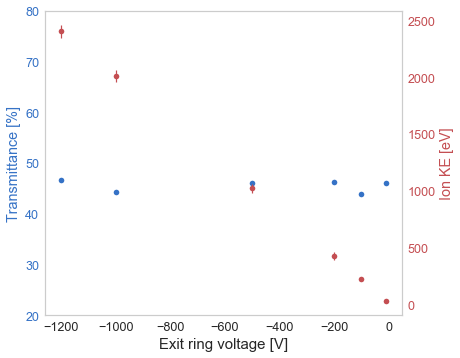

In [20]:
fig, ax1 = plt.subplots()

ax1.plot(voltages, av_trans, 'bo')
ax1.set_xlabel('Exit ring voltage [V]', fontsize=15)
ax1.set_ylabel('Transmittance [%]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(20,80)

ax2 = ax1.twinx()
ax2.errorbar(voltages, av_ke, u_ke, fmt='ro')
ax2.set_ylabel('Ion KE [eV]', color='r')
ax2.tick_params(axis='y', labelcolor='r')


##### Final Ion KE to be compared with initial: 10.1 +- 1 eV

# Run 2: entry ring V = [0, -0.1, 0.5, -1, -2, -3, -5]

In [21]:
filename = path+"/ring_voltages_in.out"
df = load_data(filename)
df

,voltage,q,a,transmission,ke,uke
0,0.0,0.71,0.2,44.800000,10.609507,1.559431
1,-0.1,0.71,0.2,44.188377,10.354386,1.420618
2,0.5,0.71,0.2,45.295295,11.586832,1.565762
3,-1.0,0.71,0.2,41.850000,8.522186,1.640372
4,-2.0,0.71,0.2,39.769885,6.665928,2.413459
5,-5.0,0.71,0.2,0.350000,3.439100,2.709018
6,-10.0,0.71,0.2,0.000000,NaN,-0.000000


In [22]:
voltages = df.voltage[~df.voltage.duplicated()].values
voltages

array([  0. ,  -0.1,   0.5,  -1. ,  -2. ,  -5. , -10. ])

In [23]:
av_trans, av_ke, u_ke = [], [], []
for m in voltages:
    dfm = df.where(df.voltage == m).dropna()
    av_trans.append(np.average(dfm.transmission))
    av_ke.append(np.average(dfm.ke))
    u_ke.append(np.average(dfm.uke))

/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/lib/function_base.py:392: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
/Users/pabloherrero/anaconda3/envs/IC-3.7-2018-11-14/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


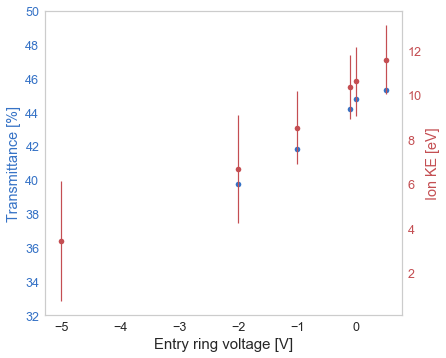

In [24]:
fig, ax1 = plt.subplots()

ax1.plot(voltages, av_trans, 'bo')
ax1.set_xlabel('Entry ring voltage [V]', fontsize=15)
ax1.set_ylabel('Transmittance [%]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(32,50)

ax2 = ax1.twinx()
ax2.errorbar(voltages, av_ke, u_ke, fmt='ro')
ax2.set_ylabel('Ion KE [eV]', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Run 3: entry ring V = [0, +0.1, +0.5, +1, +2, +3, +5]

In [76]:
filename2 = path+"/ring_voltages_in2.out"
df2 = load_data(filename2)
df2

,voltage,q,a,transmission,ke,uke
0,0.0,0.71,0.2,44.594595,10.559853,1.584654
1,0.1,0.71,0.2,44.550000,10.809697,1.679990
2,0.5,0.71,0.2,44.794795,11.479731,1.368357
3,1.0,0.71,0.2,46.873437,12.635159,1.355290
4,2.0,0.71,0.2,49.900000,14.466076,1.336490
5,3.0,0.71,0.2,49.899900,16.503006,1.321746
6,5.0,0.71,0.2,48.900000,20.369739,1.266044


In [80]:
df2.where(df2.voltage== 0).dropna()

,voltage,q,a,transmission,ke,uke
0,0.0,0.71,0.2,44.594595,10.559853,1.584654


In [26]:
voltages2 = df2.voltage[~df2.voltage.duplicated()].values
voltages2

array([0. , 0.1, 0.5, 1. , 2. , 3. , 5. ])

In [27]:
av_trans2, av_ke2, u_ke2 = [], [], []
for m in voltages2:
    df2m = df2.where(df2.voltage == m).dropna()
    av_trans2.append(np.average(df2m.transmission))
    av_ke2.append(np.average(df2m.ke))
    u_ke2.append(np.average(df2m.uke))

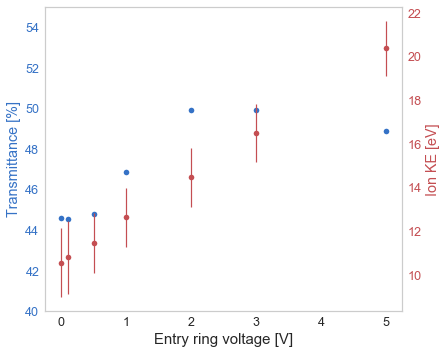

In [28]:
fig, ax1 = plt.subplots()

ax1.plot(voltages2, av_trans2, 'bo')
ax1.set_xlabel('Entry ring voltage [V]', fontsize=15)
ax1.set_ylabel('Transmittance [%]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(40,55)

ax2 = ax1.twinx()
ax2.errorbar(voltages2, av_ke2, u_ke2, fmt='ro')
ax2.set_ylabel('Ion KE [eV]', color='r')
ax2.tick_params(axis='y', labelcolor='r')


# Join both previous 

In [29]:
volt = np.append(voltages, voltages2)
av_t = np.append(av_trans, av_trans2)
av_k = np.append(av_ke, av_ke2)
u_k = np.append(u_ke, u_ke2)

In [30]:
av_t

array([44.8       , 44.18837675, 45.2952953 , 41.85      , 39.76988494,
        0.35      ,         nan, 44.59459459, 44.55      , 44.79479479,
       46.87343672, 49.9       , 49.8998999 , 48.9       ])

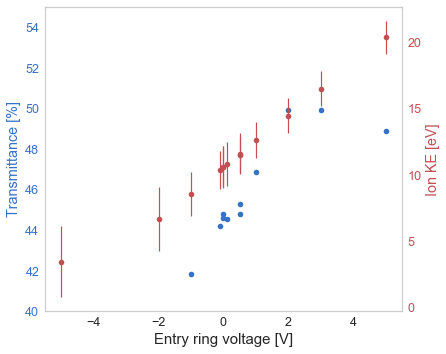

In [31]:
fig, ax1 = plt.subplots()

ax1.plot(volt, av_t, 'bo')
ax1.set_xlabel('Entry ring voltage [V]', fontsize=15)
ax1.set_ylabel('Transmittance [%]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(40,55)

ax2 = ax1.twinx()
ax2.errorbar(volt, av_k, u_k, fmt='ro')
ax2.set_ylabel('Ion KE [eV]', color='r')
ax2.tick_params(axis='y', labelcolor='r')

In [65]:
dfp = pd.DataFrame({'voltage': volt, 'transmittance': av_t})
dfp.drop(0, inplace=True)
dfp.drop(2, inplace=True)
dfp.drop(6, inplace=True)

dfp.sort_values(by='voltage', inplace=True)
dfp.reset_index(drop=True, inplace=True)
dfp

,voltage,transmittance
0,-5.0,0.350000
1,-2.0,39.769885
2,-1.0,41.850000
3,-0.1,44.188377
4,0.0,44.594595
5,0.1,44.550000
6,0.5,44.794795
7,1.0,46.873437
8,2.0,49.900000
9,3.0,49.899900


In [66]:
dfp.voltage.values

array([-5. , -2. , -1. , -0.1,  0. ,  0.1,  0.5,  1. ,  2. ,  3. ,  5. ])

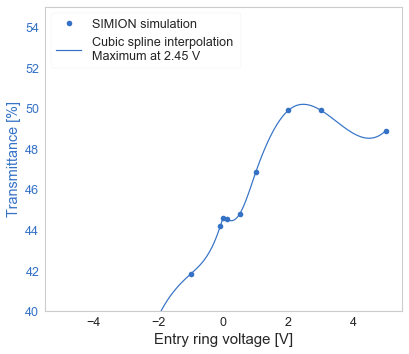

In [75]:
from scipy.interpolate import interp1d

fig, ax1 = plt.subplots()

ax1.plot(dfp.voltage, dfp.transmittance, 'bo', label='SIMION simulation')
f1 = interp1d(dfp.voltage.values, dfp.transmittance.values, kind='cubic')
xnew = np.linspace(-2, 5, 100)
ax1.plot(xnew, f1(xnew), '-b', label='Cubic spline interpolation \nMaximum at 2.45 V')

ax1.set_xlabel('Entry ring voltage [V]', fontsize=15)
ax1.set_ylabel('Transmittance [%]', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_ylim(40,55)
ax1.legend(loc='upper left')

In [73]:
xnew[np.argmax(f1(xnew))]

2.454545454545454

##### Clear maximum of transmittance at 2 V